# 2. Supervised Learning

### 2.3.6 결정 트리의 앙상블
- 앙상블
    - 여러 머신러닝의 모델을 연결하여 더 강력한 모델을 만듦
    - ex) 랜덤 포레스트, 그래디언트 부스팅

### 랜덤 포레스트 (random forest)

- 트리의 단점인 훈련 데이터가 과적합 되는 경향을 회피 가능
- 조금씩 다른 여러 결정 트리의 묶음
    - 서로 다른 방향의 과대적합된 트리를 만들어 평균 냄으로서 과대적합을 줄임 
    - 부트스트랩 샘플을 생성하여 무작위로 추출 
    - 해당 데이터셋을 이용하여 결정 트리를 생성

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [6]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

- 다섯개의 랜덤한 결정 트리의 결정 경계와 예측한 확률을 평균내어 만든 결정 경계

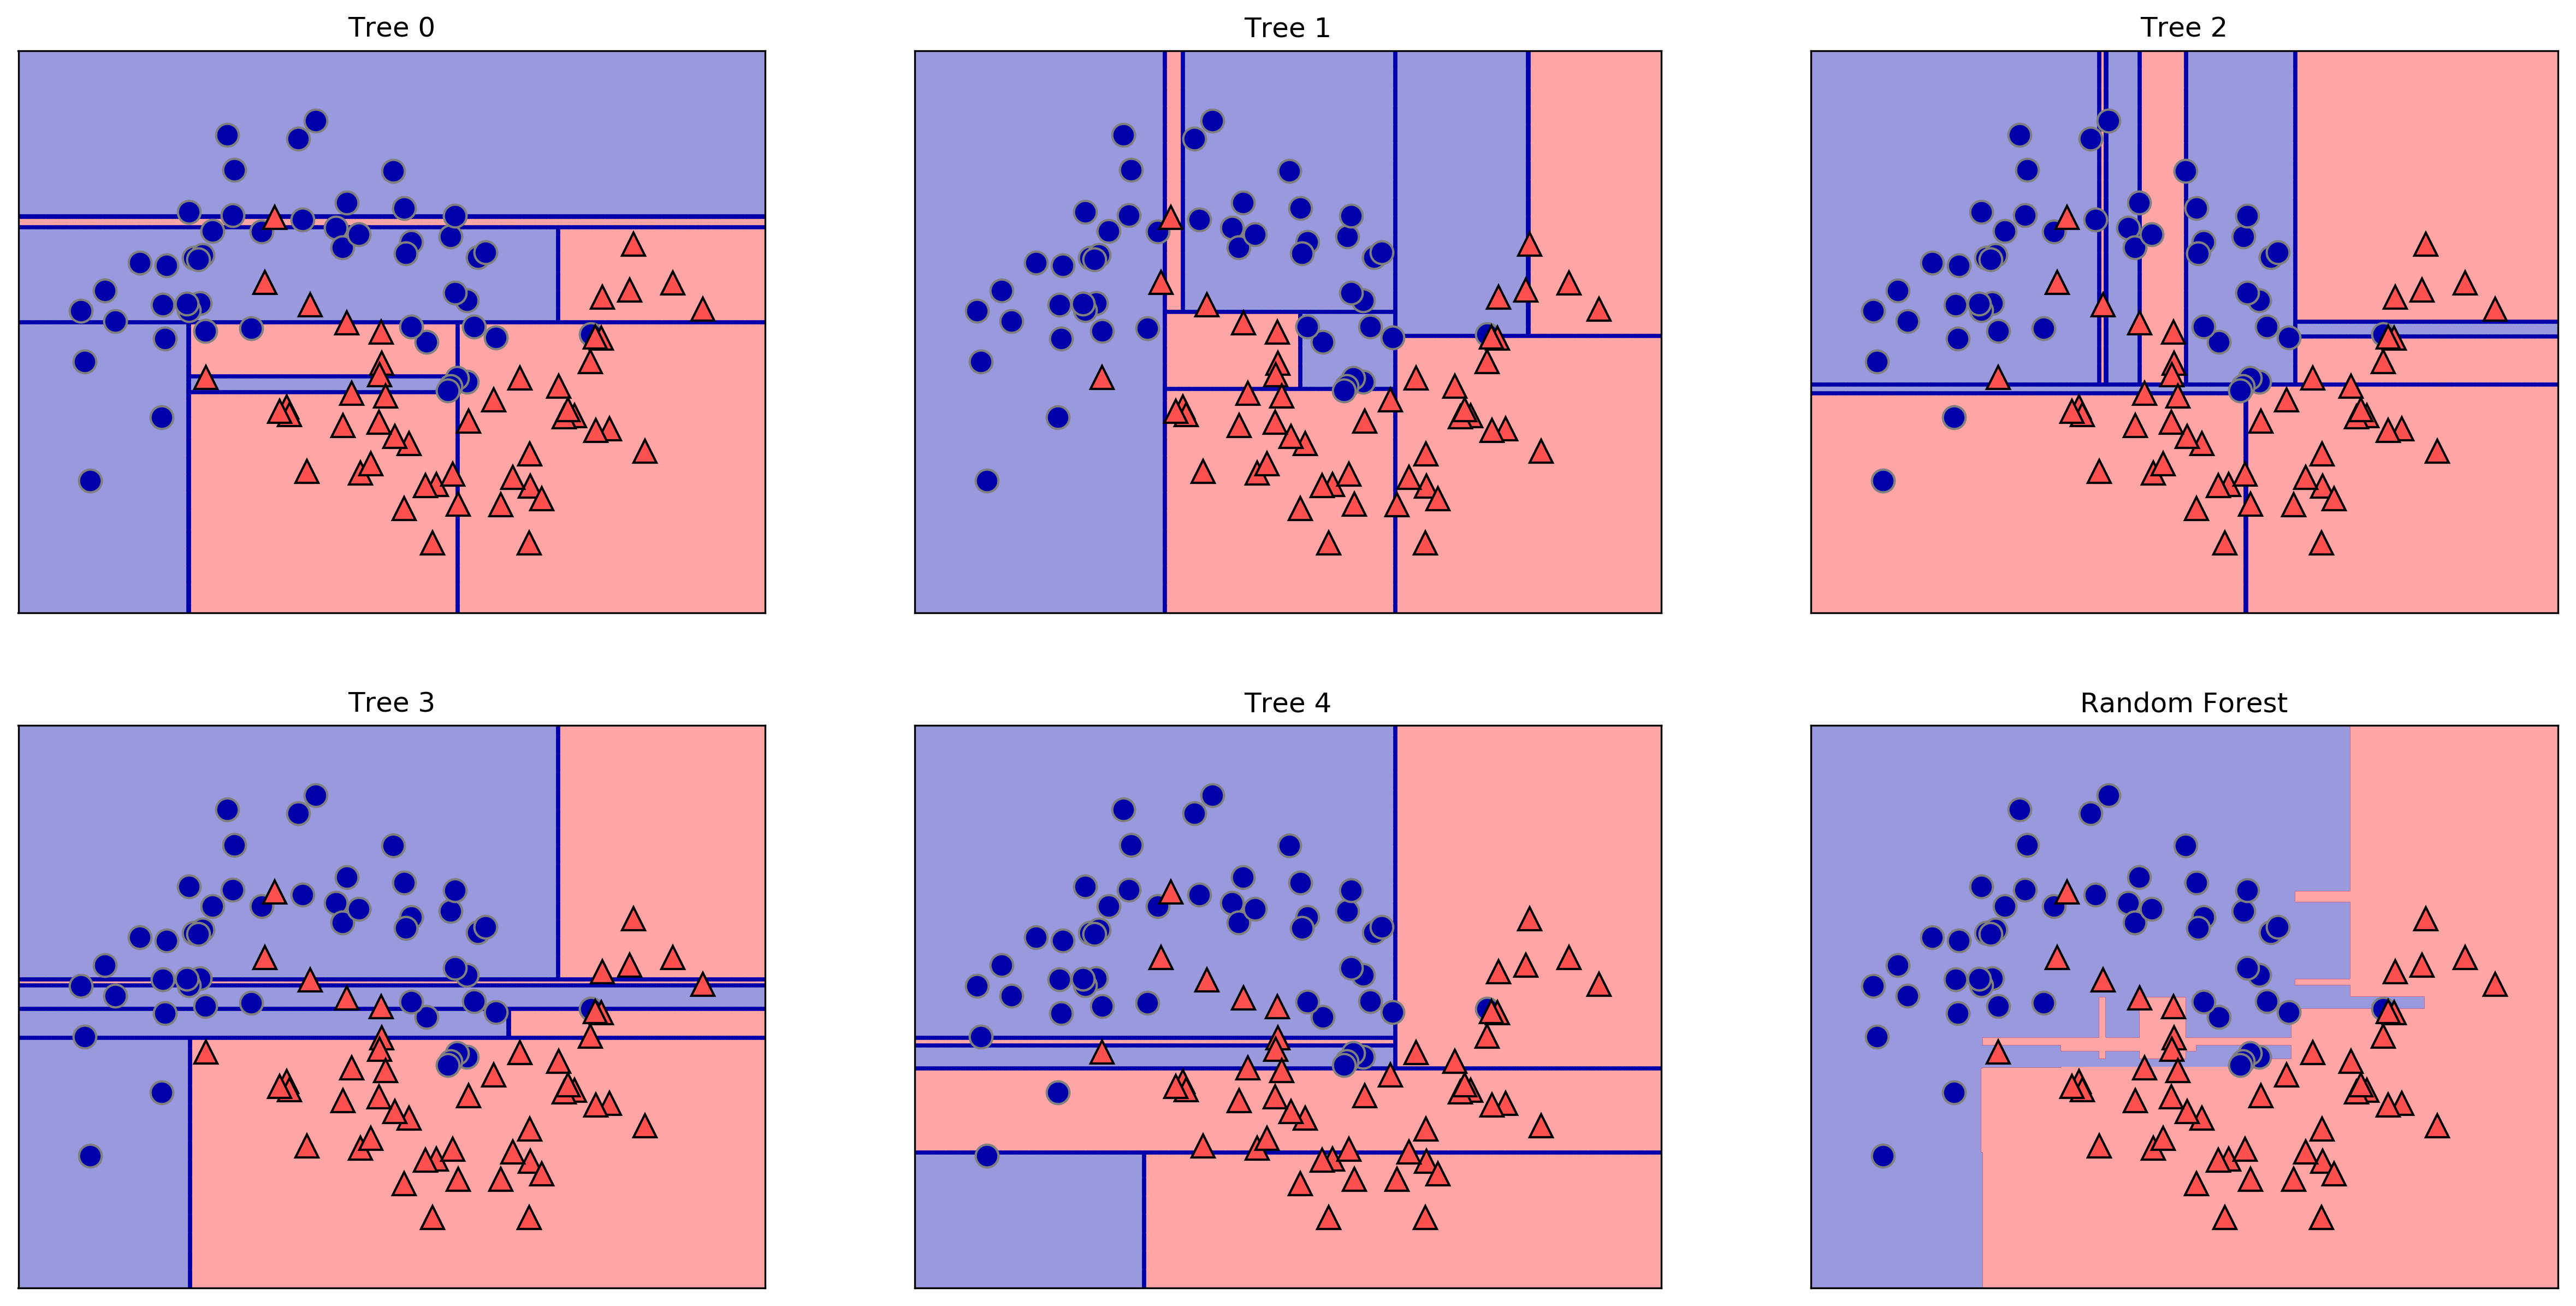

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):  #forest.estimators_에 만들어진 트리의 속성 저장
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- 유방암 데이터를 이용한 분석

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest100 = RandomForestClassifier(n_estimators=100, random_state=0)
forest100.fit(X_train, y_train)
forest10 = RandomForestClassifier(n_estimators=10, random_state=0)
forest10.fit(X_train, y_train)
forest1000 = RandomForestClassifier(n_estimators=1000, random_state=0)
forest1000.fit(X_train, y_train)

print("n_estimator is 10 Train set accuracy: {:.3f}".format(forest10.score(X_train, y_train)))
print("n_estimator is 10 Test set accuracy: {:.3f}".format(forest10.score(X_test, y_test)))

print("n_estimator is 100 Train set accuracy: {:.3f}".format(forest100.score(X_train, y_train)))
print("n_estimator is 100 Test set accuracy: {:.3f}".format(forest100.score(X_test, y_test)))

print("n_estimator is 1000 Train set accuracy: {:.3f}".format(forest1000.score(X_train, y_train)))
print("n_estimator is 1000 Test set accuracy: {:.3f}".format(forest1000.score(X_test, y_test)))

n_estimator is 10 Train set accuracy: 1.000
n_estimator is 10 Test set accuracy: 0.951
n_estimator is 100 Train set accuracy: 1.000
n_estimator is 100 Test set accuracy: 0.972
n_estimator is 1000 Train set accuracy: 1.000
n_estimator is 1000 Test set accuracy: 0.972


In [17]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

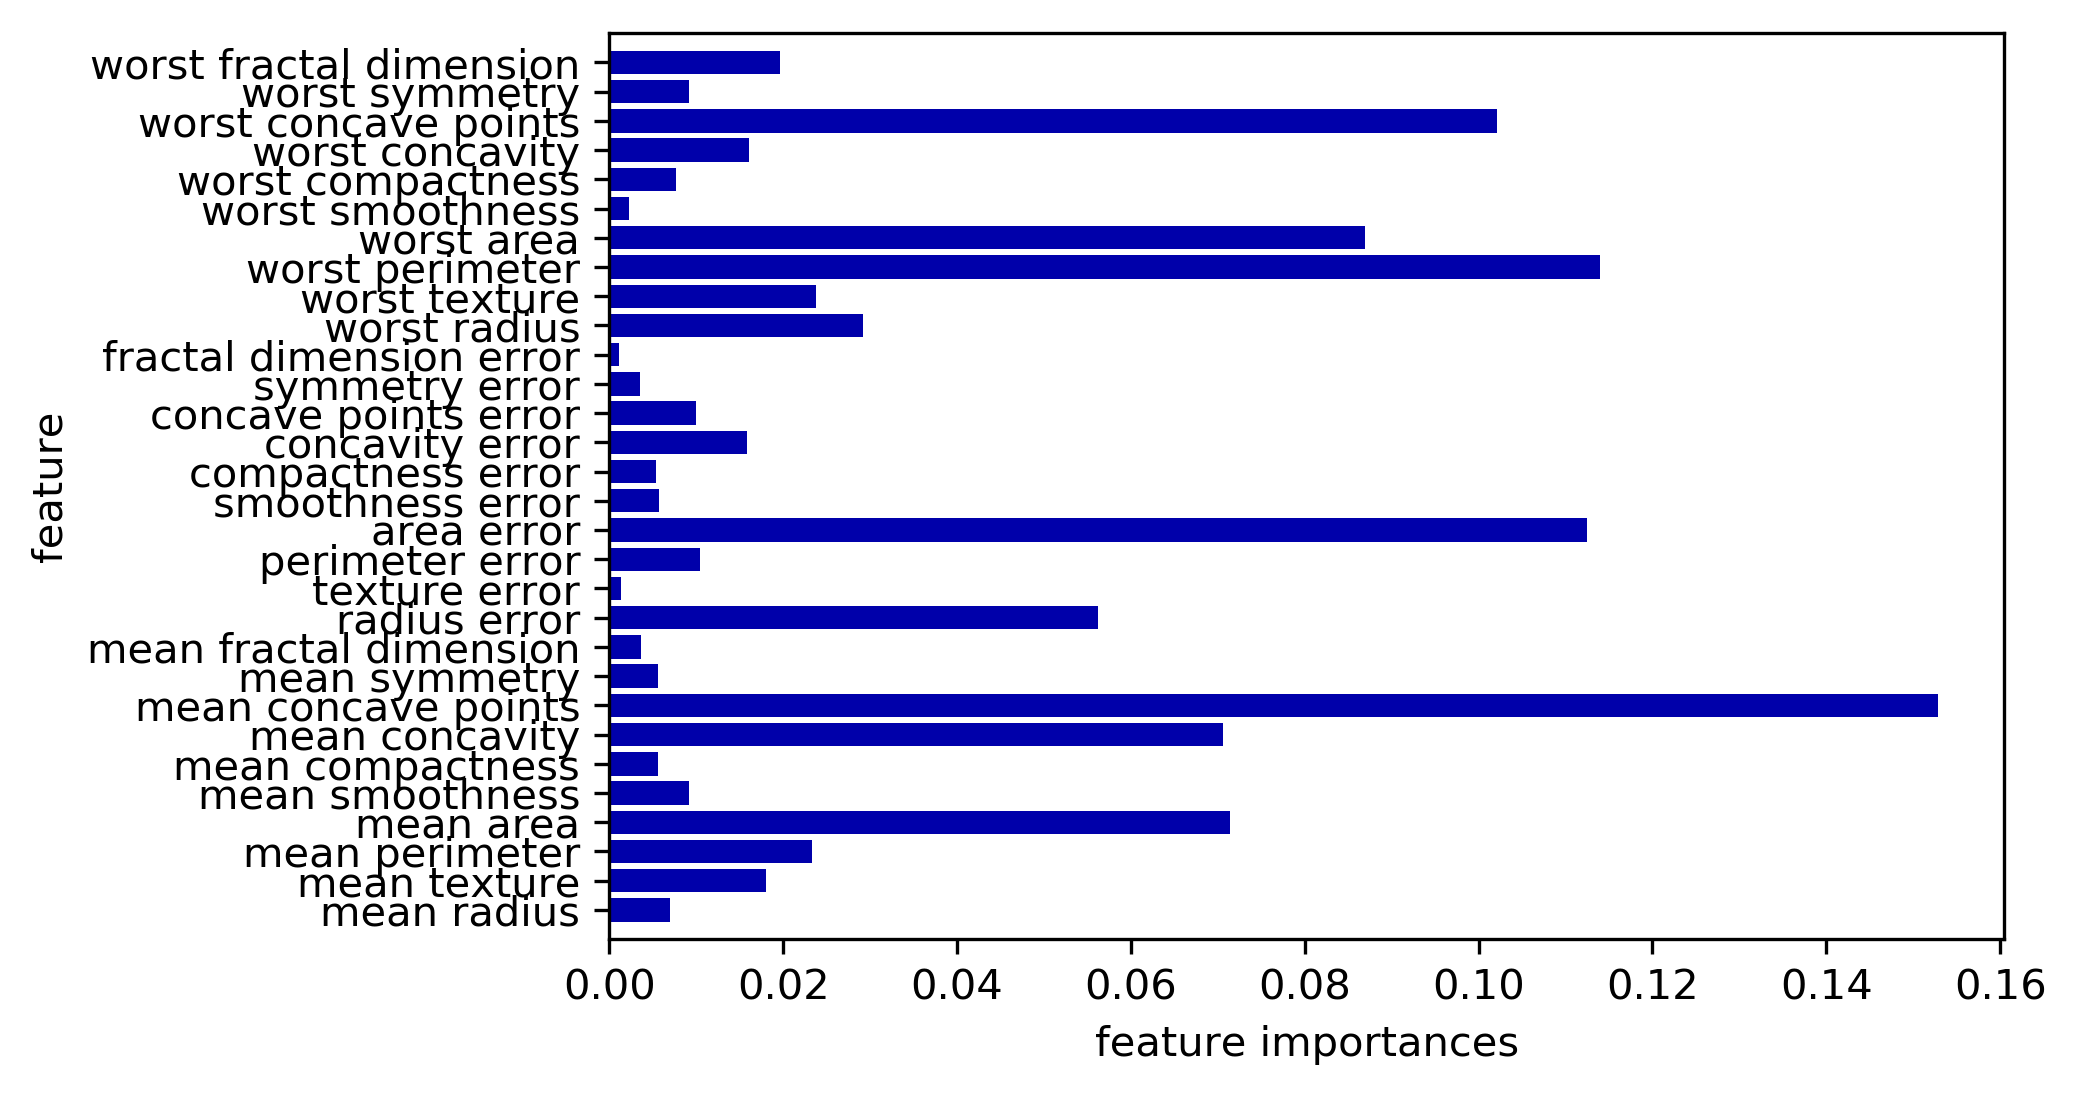

In [19]:
plot_feature_importances_cancer(forest10)

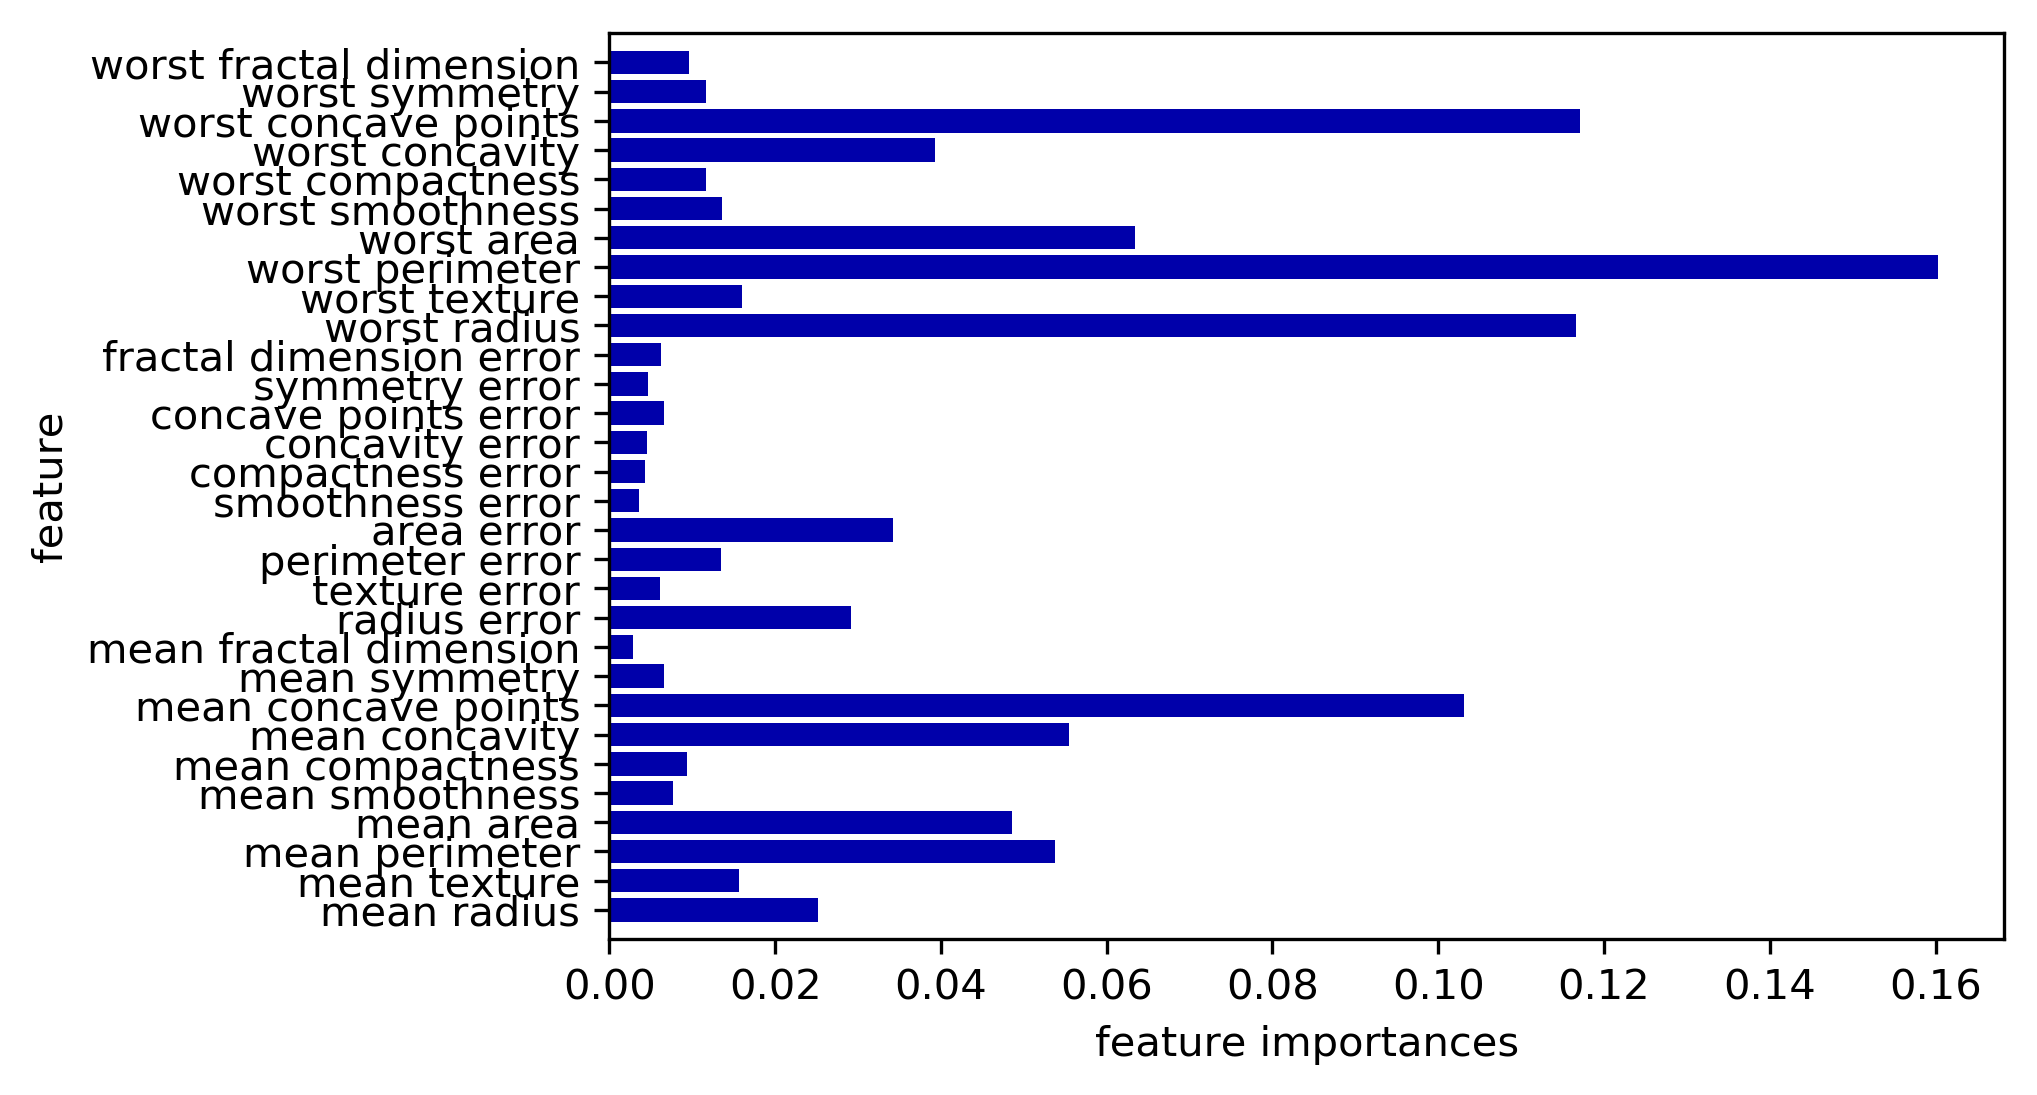

In [20]:
plot_feature_importances_cancer(forest100)

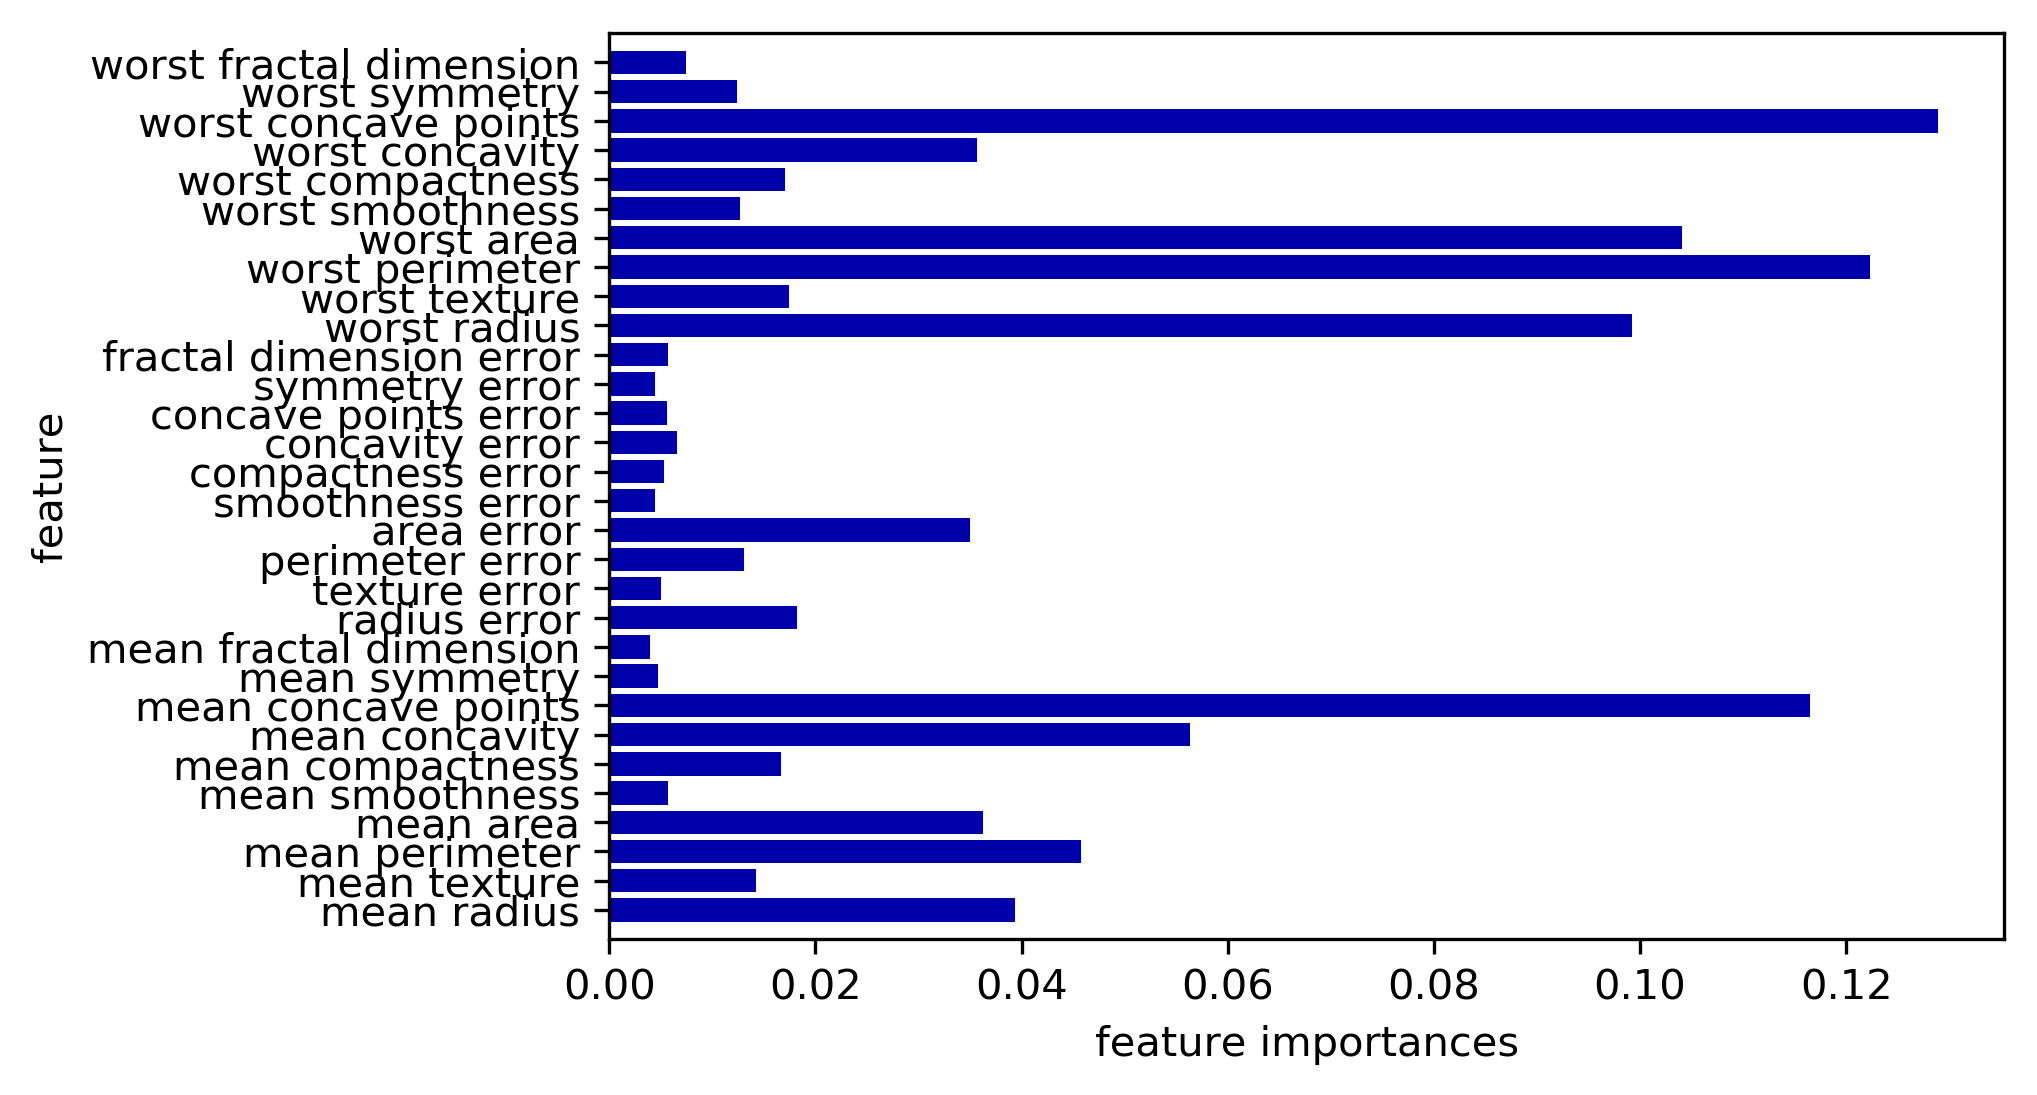

In [21]:
plot_feature_importances_cancer(forest1000)

- 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘
- 매개변수의 튜닝을 많이 하지 않아도 잘 작동
- random_state 값을 지정할 경우 전혀 다른 모델이 생성 되는 경우가 발생
    - 랜덤 포레스트 트리가 많을 수록 random_state의 변화에 따른 변동이 적음

### 그래디언트 부스팅 회귀 트리
- 여러개의 결정 트리를 묶어 강력한 모델을 생성
- 이진 트리의 오차를 보완하는 방식 (순차적으로 트리 생성)
- 무작위성 없음

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Train set Accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set Accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train set Accuracy: 1.000
Test set Accuracy: 0.958


- Train 이 100% 이지마 테스트는 낮음,...
- Train 데이터에 과대적합 발생

In [37]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)  #트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하여 학습률 낮춤
gbrt.fit(X_train, y_train)

print("Train set Accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set Accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train set Accuracy: 0.991
Test set Accuracy: 0.972


In [38]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)  #트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하여 학습률 낮춤
gbrt.fit(X_train, y_train)

print("Train set Accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set Accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train set Accuracy: 0.988
Test set Accuracy: 0.965


- 모델의 복잡도를 감소시켜 훈련 세트의 정확도가 낮아짐
- 테스트의 성능이 미약하게 개선

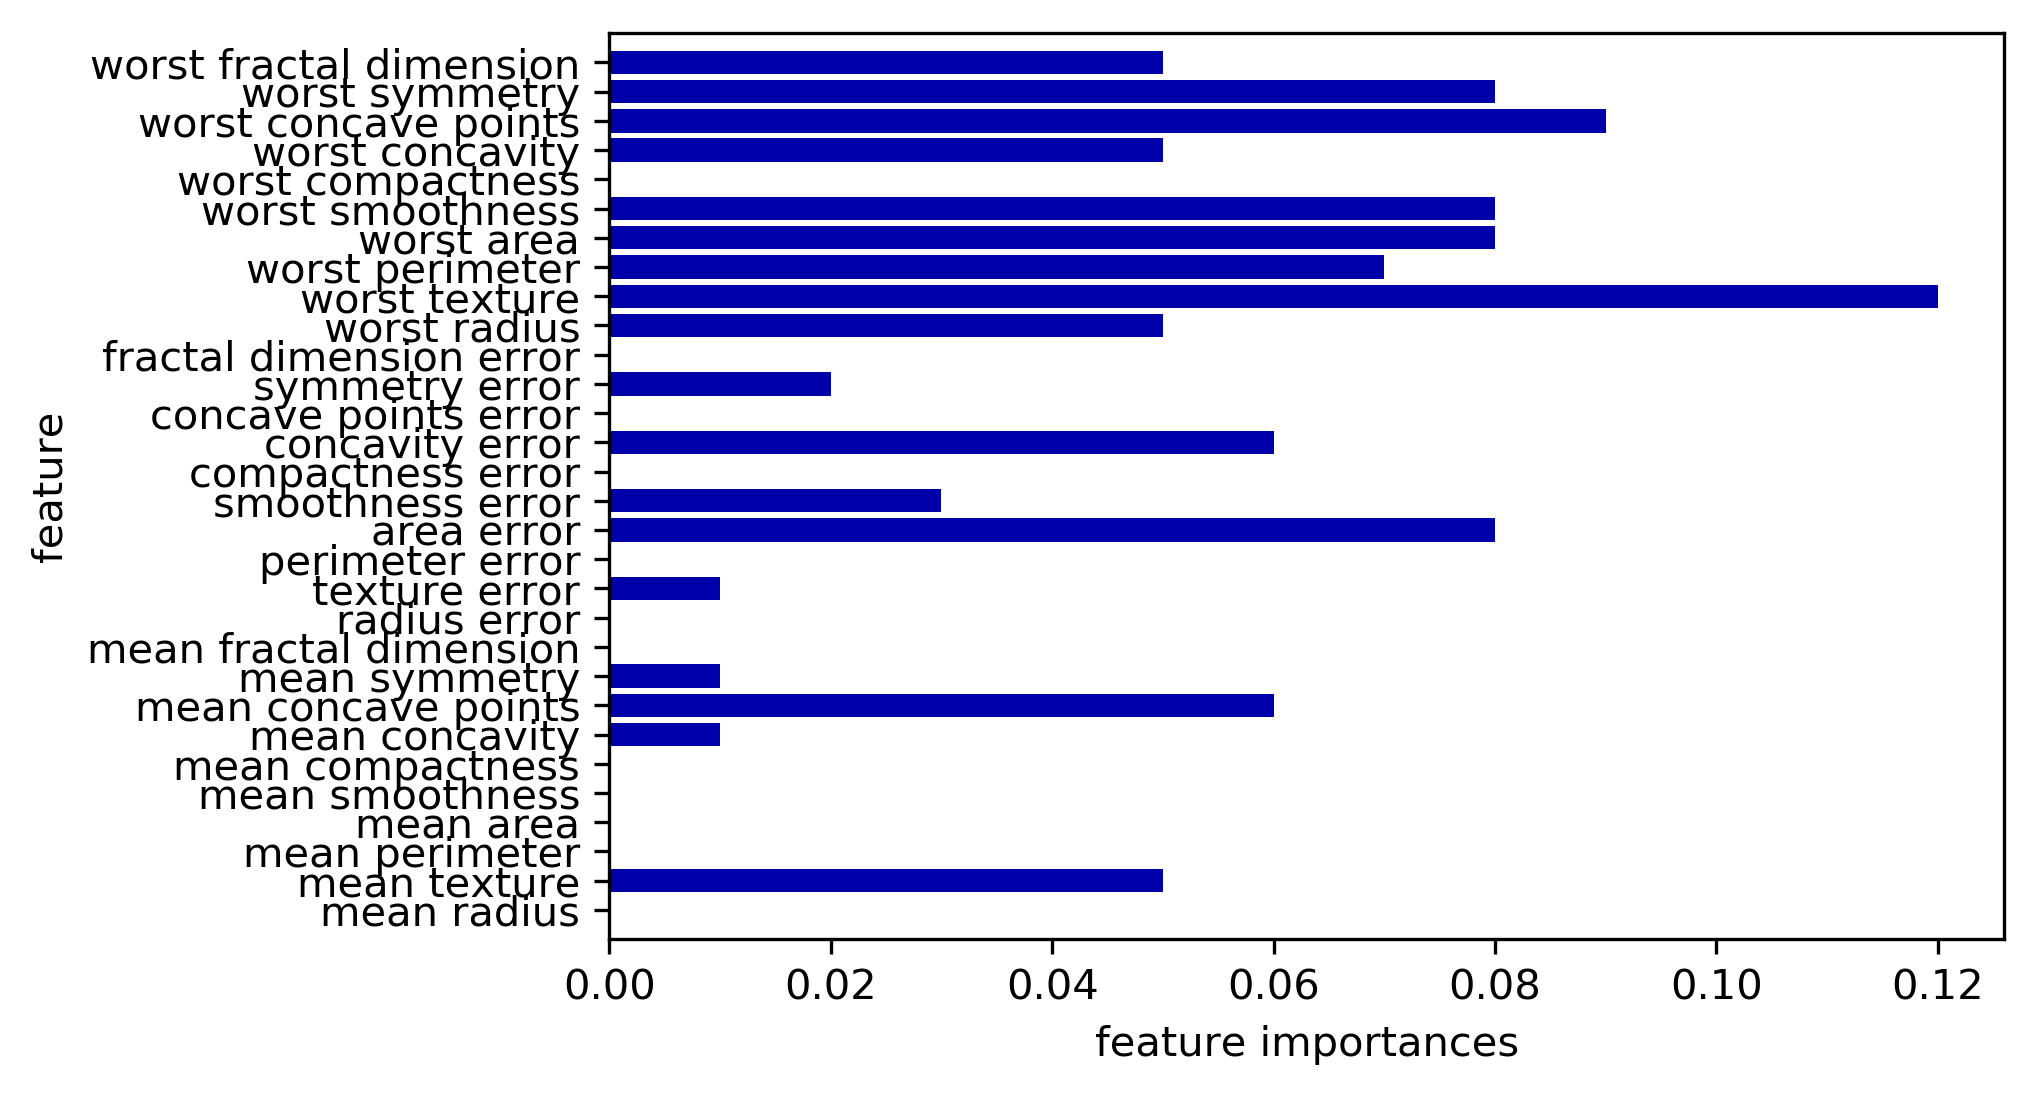

In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

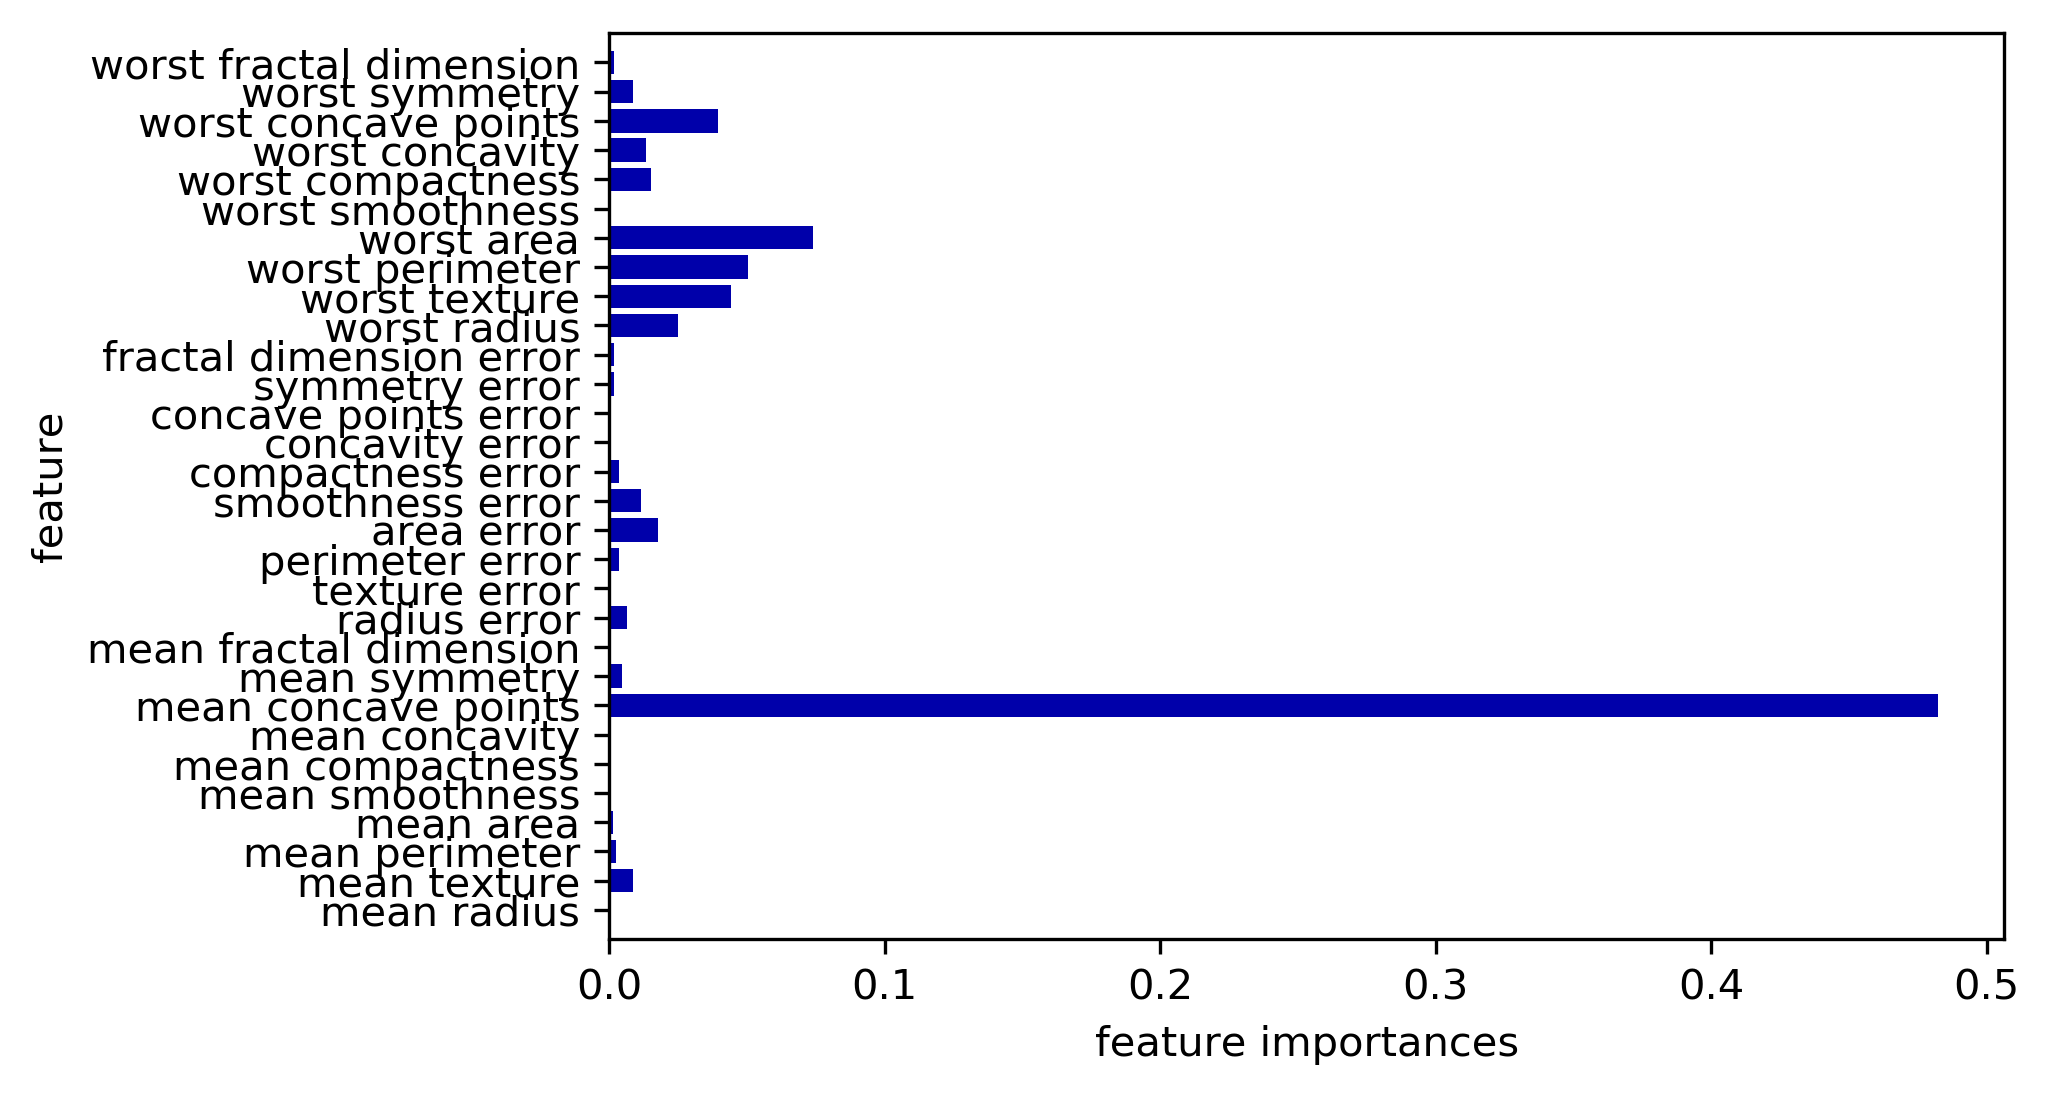

In [40]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=10)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)